
## Mapeando o National Portrait Gallery
Andar por um museu pode ser confuso, especialmente em instalações grandes e com alta variedade de peças de diferentes períodos. Assim, estudantes e visitantes podem se perder caso desejem encontrar um período histórico específico, peças de arte de maior destaque ou até mesmo um banheiro. Possivelmente uma parcela dos mais de 1,5 milhão de visitantes recebidos na National Portrait Gallery em 2018 certamente enfrentaram problemas desse gênero, já que o edifício possui 3 andares e 44 salas, além de expor, atualmente, mais de 12 mil peças.
Em vista dessa variedade de óbices, este trabalho propõe soluções para dois dos problemas elencados: encontrar o caminho mais curto até a sala a que se destina o visitante e o melhor trajeto a se tomar para que se visite todas as salas de uma determinada ala, de modo a evitar o retorno a salas em que já se esteve.
Além disso, também são discutidas características do grafo mapeado, como medidas de centralidade e de conectividade e caminhos.


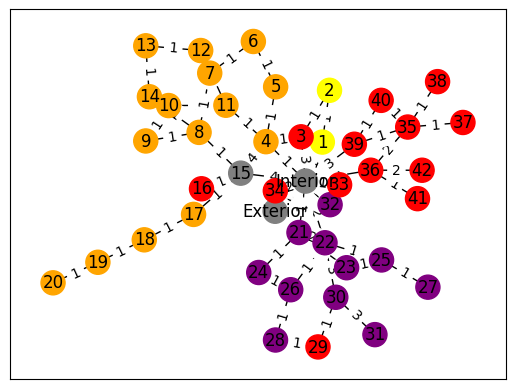

['Interior', 4, 11, 12, 13]


' galeria\ninput(galeria) '

In [8]:
import networkx as nx
import sys
import numpy
import pandas
import matplotlib.pyplot as plt

nodes = [("Exterior", "Interior", 0), ("Interior", 1, 1), ("Interior", 3, 3), ("Interior", 4, 1), ("Interior", 15, 4), ("Interior", 32, 2), ("Interior", 33, 1), ("Interior", 34, 2), ("Interior", 36, 2), ("Interior", 22, 2), ("Interior", 21, 1), ("Interior", 39, 3), (1, 2, 1), (2, 3, 1), (3, 4, 1), (4, 15, 4), (4, 11, 1), (4, 5, 1), (5, 6, 1), (6, 7, 1), (7, 8, 1), (8, 9, 1), (8, 14, 1),
         (8, 15, 1), (11, 12, 2), (12, 13, 1), (13, 14, 1), (11, 10, 2), (10, 9, 1), (15, 16, 1), (15, 17, 1), (17, 18, 1), (18, 19, 1), (19, 20, 1), (21, 22, 2), (21, 23, 1), (21, 24, 1), (24, 26, 1), (26, 28, 1), (28, 29, 1), (29, 30, 1), (26, 22, 1), (30, 31, 3), (22, 30, 3), (22, 25, 1), (23, 25, 1), (25, 27, 1), (36, 41, 1), (36, 42, 2), (36, 35, 2), (35, 37, 1), (35, 38, 1), (35, 40, 1), (35, 39, 1), (39, 40, 1)]
G = nx.Graph()
G.add_weighted_edges_from(nodes)

attrs = {
    "Interior": {"name": "Hallways", "color": "grey"},
    "Exterior": {"name": "Exterior", "color": "grey"},
    1: {"color": "yellow"},
    2: {"color": "yellow"},
    3: {"color": "red"},
    4: {"color": "orange"},
    5: {"color": "orange"},
    6: {"color": "orange"},
    7: {"color": "orange"},
    8: {"name": "The Later Stuarts", "color": "orange"},
    9: {"color": "orange"},
    10: {"color": "orange"},
    11: {"color": "orange"},
    12: {"color": "orange"},
    13: {"color": "orange"},
    14: {"color": "orange"},
    15: {"name": "Edward William Lane", "color": "grey"},
    16: {"color": "red"},
    17: {"name": "Royalty, Celebrity and Scandal", "color": "orange"},
    18: {"name": "Art, Invention and Thought: The Romantics", "color": "orange"},
    19: {"name": "Art, Invention and Thought: Making the Modern World", "color": "orange"},
    20: {"color": "orange"},
    21: {"color": "purple"},
    22: {"name":  "Statesmen's Gallery", "color": "purple"},
    23: {"color": "purple"},
    24: {"color": "purple"},
    25: {"name": "Women, Politics and Domestic Life in Victorian Britain", "color": "purple"},
    26: {"color": "purple"},
    27: {"color": "purple"},
    28: {"color": "purple"},
    29: {"color": "red"},
    30: {"name": "Britain 1901-1914", "color": "purple"},
    31: {"color": "purple"},
    32: {"color": "purple"},
    33: {"color": "red"}, 
    34: {"color": "red"},
    35: {"name": "Britain 1901-1914", "color": "red"},
    36: {"name": "Special Displays", "color": "red"},
    37: {"color": "red"},
    38: {"color": "red"},
    39: {"color": "red"},
    40: {"color": "red"},
    41: {"color": "red"},
    42: {"color": "red"},
}

position = nx.kamada_kawai_layout(G, weight=None)
nx.set_node_attributes(G, attrs)
colors = [G.nodes[node]['color'] for node in G.nodes]
weights = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_nodes(G, pos=position, node_color=colors)
nx.draw_networkx_edges(G, pos=position)
nx.draw_networkx_labels(G, pos=position)
nx.draw_networkx_edge_labels(G, pos=position, edge_labels=weights)
plt.show()

def shortest_path(G, start, end):
    res_list = []
    prev = 0
    for path in nx.all_simple_paths(G, start, end):
        sum = 0
        iterate = iter(path)
        next(iterate)
        for i in path[:-2]:
            sum+=G[i][next(iterate)]["weight"]
        if (prev >= sum or prev == 0):
            res_list = path
            prev = sum
    return res_list

print(shortest_path(G, "Interior", 13))

### Bellman Ford:
O Algoritmo de Bellman-Ford é um algoritmo de busca de caminho mínimo em um digrafo (grafo orientado ou dirigido) ponderado, ou seja, cujas arestas têm peso, inclusive negativo.

In [9]:
class Graph:

    def __init__(self, vertices):

        self.M = vertices   # número total dos vértices no grafo
        self.graph = []     # Vetor dos caminhos

    # adicionar caminho
    def add_edge(self, a, b, c):

        self.graph.append([a, b, c])

    # Printar a solução
    def print_solution(self, distance, origem):

        print("\n\nDistância mínima do ponto de origem escolhido\n\n")

        for k in range(self.M):

            print(str(origem)+" -> {0}\tdistancia =  {1}".format(k, distance[k]))

    def bellman_ford(self, src):

        distance = [float("Inf")] * self.M
        distance[src] = 0

        for _ in range(self.M - 1):

            for a, b, c in self.graph:

                if distance[a] != float("Inf") and distance[a] + c < distance[b]:

                    distance[b] = distance[a] + c
                    print(f"rota atual = {a} {b}")

            #CASO TENHA ALGUM CAMINHO DE VALOR NEGATIVO
        """ for a, b, c in self.graph: 

            if distance[a] != float("Inf") and distance[a] + c < distance[b]:

                print("Graph contains negative weight cycle")
                
                return """
                
        self.print_solution(distance, src)

g = Graph(43)

nodes = [(0, 1, 1), (0, 3, 3), (0, 4, 1), (0, 15, 4), (0, 32, 2), (0, 33, 1), (0, 34, 2), (0, 36, 2), (0, 22, 2), (0, 21, 1), (0, 39, 3), 
         (1, 2, 1), (2, 3, 1), (3, 4, 1), (4, 15, 4), (4, 11, 1), (4, 5, 1), (5, 6, 1), (6, 7, 1), (7, 8, 1), (8, 9, 1), (8, 14, 1),
         (8, 15, 1), (11, 12, 2), (12, 13, 1), (13, 14, 1), (11, 10, 2), (10, 9, 1), (15, 16, 1), (15, 17, 1), (17, 18, 1), (18, 19, 1), (19, 20, 1), (21, 22, 2),
         (21, 23, 1), (21, 24, 1), (24, 26, 1), (26, 28, 1), (28, 29, 1), (29, 30, 1), (26, 22, 1), 
         (30, 31, 3), (22, 30, 3), (22, 25, 1), (23, 25, 1), (25, 27, 1), (36, 41, 1), (36, 42, 2), (36, 35, 2), (35, 37, 1), (35, 38, 1), (35, 40, 1), (35, 39, 1), (39, 40, 1),
         (1, 0, 1), (3, 0, 3), (4, 0, 1), (15, 0, 4), (32, 0, 2), (33, 0, 1), (34, 0, 2), (36, 0, 2), (22, 0, 2), (21, 0, 1), (39, 0, 3), 
         (2, 1, 1), (3, 2, 1), (4, 3, 1), (15, 4, 4), (11, 4, 1), (5, 4, 1), (6, 5, 1), (7, 6, 1), (8, 7, 1), (9, 8, 1), (14, 8, 1),
         (15, 8, 1), (12, 11, 2), (13, 12, 1), (14, 13, 1), (10, 11, 2), (9, 10, 1), (16, 15, 1), (17, 15, 1), (18, 17, 1), (19, 18, 1), (20, 19, 1), (22, 21, 2),
         (23, 21, 1), (24, 21, 1), (26, 24, 1), (28, 26, 1), (29, 28, 1), (30, 29, 1), (22, 26, 1), 
         (31, 30, 3), (30, 22, 3), (25, 22, 1), (25, 23, 1), (27, 25, 1), (41, 36, 1), (42, 36, 2), (35, 36, 2), (37, 35, 1), (38, 35, 1), (40, 35, 1), (39, 35, 1), (40, 39, 1)]

for node in nodes:
    g.add_edge(node[0], node[1], node[2])

origem = int(input("Digite o ponto de partida: "))
g.bellman_ford(origem)

rota atual = 5 6
rota atual = 6 7
rota atual = 7 8
rota atual = 8 9
rota atual = 8 14
rota atual = 8 15
rota atual = 15 16
rota atual = 15 17
rota atual = 17 18
rota atual = 18 19
rota atual = 19 20
rota atual = 15 0
rota atual = 15 4
rota atual = 5 4
rota atual = 14 13
rota atual = 9 10
rota atual = 0 1
rota atual = 0 3
rota atual = 0 32
rota atual = 0 33
rota atual = 0 34
rota atual = 0 36
rota atual = 0 22
rota atual = 0 21
rota atual = 0 39
rota atual = 1 2
rota atual = 4 11
rota atual = 11 12
rota atual = 11 10
rota atual = 21 23
rota atual = 21 24
rota atual = 24 26
rota atual = 26 28
rota atual = 28 29
rota atual = 29 30
rota atual = 30 31
rota atual = 22 30
rota atual = 22 25
rota atual = 25 27
rota atual = 36 41
rota atual = 36 42
rota atual = 36 35
rota atual = 35 37
rota atual = 35 38
rota atual = 35 40
rota atual = 39 40
rota atual = 4 0
rota atual = 4 3
rota atual = 0 1
rota atual = 0 32
rota atual = 0 33
rota atual = 0 34
rota atual = 0 36
rota atual = 0 22
rota atual = 0

In [10]:
from math import sqrt
 
# Função recursivo para imprimir o caminho de um determinado vértice do vértice de origem
def getPath(parent, vertex):
    if vertex < 0:
        return []
    return getPath(parent, parent[vertex]) + [vertex]
 
# Função para executar o algoritmo Bellman–Ford de uma determinada fonte
def bellmanFord(edges, source, n):
    # distance[] e parent[] armazena as informações do caminho mais curto (menor custo/caminho)
    distance = [sys.maxsize] * n
    parent = [-1] * n
 
    # Inicialmente, todos os vértices exceto o peso do vértice de origem INFINITY e nenhum pai
    distance[source] = 0
 
    # passo de relaxamento (executar V-1 vezes)
    for k in range(n - 1):
        # aresta de `u` a `v` com peso `w`
        for (u, v, w) in edges:
            # se a distância até o destino `v` puder ser encurtada tomando a borda (u, v)
            if distance[u] != sys.maxsize and distance[u] + w < distance[v]:
                # distância de atualização # para o novo valor mais baixo
                distance[v] = distance[u] + w
                # define o pai de v como `u`
                parent[v] = u
 
    # execute a etapa de relaxamento mais uma vez pela enésima vez para verificar se há ciclos de peso negativo
    for (u, v, w) in edges:  # aresta de `u` a `v` com peso `w`
        # se a distância até o destino `u` puder ser encurtada tomando a borda (u, v)
        if distance[u] != sys.maxsize and distance[u] + w < distance[v]:
            print('CAMINHO NEGATIVO ENCONTRADO!!')
            return
 
    for i in range(int(sqrt(n))):
        if i != source and distance[i] < sys.maxsize:
            print(f'A distância do ponto  {i}  para o destino  {source}  é  {distance[i]}. '
                  f'O menor caminho a se tomar é: ', getPath(parent, i))
 
 
if __name__ == '__main__':
 
    # define o número máximo de nós no gráfico
    n = 900000

    #entrada do código
    entrada = int(input("Escolha o ponto de destino: "))
 
    # executa o algoritmo Bellman-Ford de cada nó
    bellmanFord(nodes, entrada, n)


A distância do ponto  0  para o destino  12  é  4. O menor caminho a se tomar é:  [12, 11, 4, 0]
A distância do ponto  1  para o destino  12  é  5. O menor caminho a se tomar é:  [12, 11, 4, 0, 1]
A distância do ponto  2  para o destino  12  é  5. O menor caminho a se tomar é:  [12, 11, 4, 3, 2]
A distância do ponto  3  para o destino  12  é  4. O menor caminho a se tomar é:  [12, 11, 4, 3]
A distância do ponto  4  para o destino  12  é  3. O menor caminho a se tomar é:  [12, 11, 4]
A distância do ponto  5  para o destino  12  é  4. O menor caminho a se tomar é:  [12, 11, 4, 5]
A distância do ponto  6  para o destino  12  é  5. O menor caminho a se tomar é:  [12, 11, 4, 5, 6]
A distância do ponto  7  para o destino  12  é  4. O menor caminho a se tomar é:  [12, 13, 14, 8, 7]
A distância do ponto  8  para o destino  12  é  3. O menor caminho a se tomar é:  [12, 13, 14, 8]
A distância do ponto  9  para o destino  12  é  4. O menor caminho a se tomar é:  [12, 13, 14, 8, 9]
A distância do 

## REFERÊNCIAS

⦁	Visitor Numbers. [Online]. Avaliable: https://www.npg.org.uk/about/organisation/visitor-numbers

⦁	How large is the collection. [Online]. Avaliable: https://www.npg.org.uk/about/faq/how-large-is-the-collection.php

⦁	TOPOLOGICAL MAPPING OF ORGANIC MOLECULES. [Online]. Avaliable: https://www.pnas.org/doi/abs/10.1073/pnas.53.1.134

⦁	Graph theory methods: applications in brain networks. [Online]. Avaliable: https://www.tandfonline.com/doi/full/10.31887/DCNS.2018.20.2/osporns

⦁	[PDF] Optimal Museum Traversal Using Graph Theory

⦁	Mobile Service for Adaptive Museum Visits in Wireless-Optical Networks. [Online]. Avaliable: https://hal.archives-ouvertes.fr/hal-02470923/

⦁	Königsberg bridge problem. [Online]. Avaliable: https://www.britannica.com/science/Konigsberg-bridge-problem

⦁	Comparative Analysis between Dijkstra and Bellman-Ford Algorithms in Shortest Path Optimization. [Online]. Avaliable: https://iopscience.iop.org/article/10.1088/1757-899X/917/1/
012077/meta

⦁	An algorithm for drawing general undirected graphs. [Online]. Avaliable:https://www.sciencedirect.com/science/article/abs/pii/0020019089901026?via%3Dihub
